## Анализ эффективности затрат

### Цели

Цель клиента получать больше целевых визитов по меньшей стоимости. 

### Задачи

1. Оценить текущее положение клиента относительно конкурентов в категории (сравнительный анализ эффективности затрат)
2. на основе выводов из п1 сформировать рекомендации по использованию инструментов, площадок, устройств

In [91]:
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [182]:
Data = pd.read_excel('source_data.xlsx', engine='openpyxl', sheet_name=1)
Data

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CTR,CR2 (%),CR12 (%),CPC,CPM,CPA,goal_cost*10000
0,Бета,234679,2020-07-01,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
1,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.482339,3,2.609421,0.14985,0.00391,9.724017,0.253741,6489.16078,1.541031
2,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.924703,0,1.252700,0.00000,0.00000,22.335558,0.279797,0.00000,0.000000
3,Гамма,458303,2019-06-01,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
4,Гамма,458303,2019-04-01,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.504949,0,3.039794,0.00000,0.00000,5.068491,0.154072,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Псилон,285755,2020-02-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
11908,Псилон,285755,2020-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Desktop,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
11909,Псилон,285755,2019-07-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
11910,Псилон,285755,2019-08-01,СТРАХОВАНИЕ ВЫЕЗЖАЮЩИХ ЗА РУБЕЖ,Mobile,Networks,cpm_banner,none,Retargeting,0,0,0.000000,0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000


### Изучим данные

In [183]:
def some_info(df):
    print("Some info about dataset\n") 
    # Shape
    print("This dataset has {} features.".format(df.shape[1]), sep='')
    print("This dataset has {} observations.\n".format(df.shape[0]), sep='')
    
    # Describe
    print("Describe:\n", df.describe(), "\n\n", sep='')
    
    # Missing values
    print("Missing values:\n\n", df.isna().sum(), "\n", sep='')
    
    # Data head
    print('Data head:\n\n', df.head(), sep='')
    
    # Unique values
    for i in Data.columns:
        print('\n', i, ':\n', np.unique(Data[i]), ' - ', len(np.unique(Data[i])), sep='')

some_info(Data)

Some info about dataset

This dataset has 20 features.
This dataset has 11912 observations.

Describe:
           client_id         Shows        Clicks  Cost_rub_wo_NDS  \
count   11912.000000  1.191200e+04  1.191200e+04     1.191200e+04   
mean   391221.887173  1.543281e+06  9.036348e+03     3.314341e+05   
std    165094.604865  1.450424e+07  4.197406e+04     1.143483e+06   
min    234679.000000  0.000000e+00  0.000000e+00     0.000000e+00   
25%    285755.000000  2.000000e+00  0.000000e+00     0.000000e+00   
50%    333348.000000  1.202500e+04  2.690000e+02     1.269611e+04   
75%    458303.000000  1.250925e+05  4.824250e+03     1.873158e+05   
max    993003.000000  5.831506e+08  2.237376e+06     3.976618e+07   

        Сonversions           CTR       CR2 (%)      CR12 (%)           CPC  \
count  11912.000000  11912.000000  11912.000000  11912.000000  11912.000000   
mean     467.574715      6.368463      5.064775      0.881194     61.524351   
std     1967.808978     12.000155     

Данные представлены по 11 клиентам за период с апреля 2019 по сентябрь 2020 года. Датасет содержит 11912 наблюдений по 20 переменным (их описание содержится в файле source_data.xlsx)

Все наблюдения разделены на 10 категорий в зависимости от рекламируемого продукта. В данном кейсе нас интересует Потребительское кредитование.

Среди девайсов представлены мобильные устройства и компьютеры. Размещение рекламы может происходить на двух типах площадок - тематической или РСЯ (Networks) и поисковой (Search), в свою очередь для поисковой площадки определены типы запросов - Брендовые, Competitor (целевые) и Иные для площадки Networks эта переменная всегда равна none. По типу таргетинга все размещения разделены на Автотаргетинг, Ключевые фразы и Ретаргетинг.

Типы банеров:
* cpc_video - видеообъявление в кампаниях с типом «Текстово-графические объявления» или «Реклама мобильных приложений»
* cpm_banner - медийный баннер
* dynamic - динамическое объявление
* image_ad - графическое объявление
* mcbanner - кампания с типом «Баннер на поиске»
* performance - перфоманс реклама, направленная на достижение измеримого результата и призывающая к конкретному действию
* text - текстово-графическое (обычное) объявление

Далее идет ряд искуственно созданных переменных:
* ClickTroughRate - показатель, характеризующий отношение количества целевых действий к числу показов.
* ConversionRate - характеризует отношение переходов на следующий этап к общему числу посетителей на предыдущем этапе.
* CostPerClick - цена за клик
* CostPerMile - цена за тысячу показов
* CostPerAction - цена за совершение целевого действия

Определимся с целевой метрикой.
Конечную эффективность рекламного размещения можно оценить только имея данные по финансовым результатам. Поскольку в приведенном датасете конечным звеном является количество совершенных целевых действий, то нам придется отказаться от метрик рентабельности продаж и оценки средней маржи. Рассмотрим доступные для расчета метрики кликабельности (CTR), конверсии на втором этапе, общей конверсии, цену за клик (CPC), цену за тысячу показов (CPM) и цену за совершение целевого действия (CPA).
Из всех перечисленных метрик ближе всего к финансовым результатм метрика цены за совершение целевого действия и общей конверсии, поэтому именно их мы и будем рассматривать. Также введем своб метрику равную отношению количества целевых визитов к рекламному бюджету

### Выделим интересующего клиента, категорию и временные рамки

In [184]:
omega = Data[Data['Client'] == 'Омега']
omega = omega[omega['Category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ']
omega = omega[omega['Month'] >= '2020-01-01']
omega = omega[omega['Month'] < '2020-09-01']
# omega.to_excel('test.xlsx')

omega_client = Data[Data['Client'] == 'Омега']
omega_client = omega_client[omega_client['Category'] == 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ']
# omega_client.to_excel('omega.xlsx')

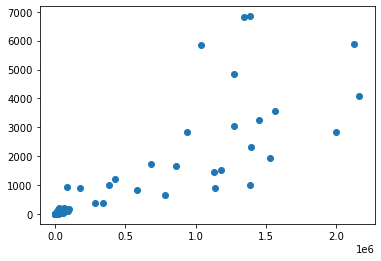

In [185]:
plt.scatter(omega['Cost_rub_wo_NDS'], omega['Сonversions'])

In [192]:
Data = Data[Data['Category']=='ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ']
Data = Data[Data['Month'] >= '2020-01-01']
Data = Data[Data['Month'] < '2020-09-01']

alpha_client = Data[Data['Client']=='Альфа']
# alpha_client.to_excel('alpha_client.xlsx')

beta_client = Data[Data['Client']=='Бета']
# beta_client.to_excel('beta_client.xlsx')

gamma_client = Data[Data['Client']=='Гамма']
# gamma_client.to_excel('gamma_client.xlsx')

delta_client = Data[Data['Client']=='Дельта']
# delta_client.to_excel('delta_client.xlsx')

zeta_client = Data[Data['Client']=='Зета']
# zeta_client.to_excel('zeta_client.xlsx')

lambda_client = Data[Data['Client']=='Лямбда']
# lambda_client.to_excel('lambda_client.xlsx')

meta_client = Data[Data['Client']=='Мета']
# meta_client.to_excel('meta_client.xlsx')

micron_client = Data[Data['Client']=='Микрон']
# micron_client.to_excel('micron_client.xlsx')

psilon_client = Data[Data['Client']=='Псилон']
# psilon_client.to_excel('psilon_client.xlsx')

sigma_client = Data[Data['Client']=='Сигма']
# sigma_client.to_excel('sigma_client.xlsx')
df = pd.DataFrame(columns=['Client', 'Budget', 'Shows'])
for i in [alpha_client, beta_client, gamma_client, zeta_client, 
          lambda_client, meta_client, psilon_client, sigma_client, omega_client]:
    i = i[i['Cost_rub_wo_NDS'] != 0]
    obj = {'Client': np.unique(i['Client'])[0], 'CBR': np.mean(i['Сonversions']*10000/i['Cost_rub_wo_NDS']) ,'Budget': round(sum(i['Cost_rub_wo_NDS'])), 'Shows': round(sum(i['Shows'])),
          'Conversion': round(sum(i['Сonversions']))}
    df = df.append(obj, ignore_index=True)
    print(obj, len(i))
    
df.to_excel('bar_graph.xlsx')

{'Client': 'Альфа', 'CBR': 14.76980104125984, 'Budget': 35150064, 'Shows': 36088375, 'Conversion': 56486} 77
{'Client': 'Бета', 'CBR': 17.483424602228887, 'Budget': 124041198, 'Shows': 853095995, 'Conversion': 190411} 112
{'Client': 'Гамма', 'CBR': 39.32365776871053, 'Budget': 28588036, 'Shows': 129666896, 'Conversion': 109752} 135
{'Client': 'Зета', 'CBR': 17.90522570009709, 'Budget': 34902894, 'Shows': 5200383, 'Conversion': 20151} 48
{'Client': 'Лямбда', 'CBR': 29.692971194469834, 'Budget': 59378160, 'Shows': 262457483, 'Conversion': 221482} 86
{'Client': 'Мета', 'CBR': 39.9229958183601, 'Budget': 21981982, 'Shows': 103372933, 'Conversion': 141441} 80
{'Client': 'Псилон', 'CBR': 30.41304197857939, 'Budget': 37579081, 'Shows': 63421791, 'Conversion': 54678} 114
{'Client': 'Сигма', 'CBR': 127.32869843120946, 'Budget': 59565122, 'Shows': 261788461, 'Conversion': 228393} 98
{'Client': 'Омега', 'CBR': 17.397697839839353, 'Budget': 77460140, 'Shows': 16698354, 'Conversion': 135135} 120


In [193]:
print('Budget: ', sum(sigma_client['Cost_rub_wo_NDS']))
wo_0 = sigma_client[sigma_client['CR12 (%)'] != 0]
print("Mean CR12: ", np.mean(wo_0['CR12 (%)']))

print('Budget: ', sum(omega['Cost_rub_wo_NDS']))
wo_0 = omega[omega['CR12 (%)'] != 0]
print("Mean CR12: ", np.mean(wo_0['CR12 (%)']))

Budget:  59565122.47799988
Mean CR12:  2.2040131775245144
Budget:  29791913.643228713
Mean CR12:  2.1663693052738537


In [209]:
print(sum(omega['Сonversions']))
# print(sum(alpha_client['Сonversions']))
# print(sum(beta_client['Сonversions']))
# print(sum(gamma_client['Сonversions']))
# print(sum(zeta_client['Сonversions']))
# print(sum(lambda_client['Сonversions']))
# print(sum(meta_client['Сonversions']))
# print(sum(psilon_client['Сonversions']))
print(sum(sigma_client['Сonversions']))

70183
229930
